*(a) Linear Algebra flashcards and (b) some notes on numerical computation available at bottom of notebook*

Generally, however, this notebook addresses selected topics

- Matrix Multiplicatiton
- Eigenvectors/values
- Gradients/Hessians
- Matrix Definiteness, Etc. 

as an excuse to do some 
# Python
and a little $\LaTeX$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I personally don't care where you have your imports, tbh.  Do you? 
# Please change my mind!

In [2]:
# Oh!--Unrelated: I like the concept "Model Capacity" a lot... Do you?/Have you heard of it?

## Vectors

- Like, duh, the basic building block of everything ML: "Everything's a vector..."

In [3]:
X = np.array([[2],[.5]])
X

array([[2. ],
       [0.5]])

## (Linear) Transformations
- E.g., [rotations](https://en.wikipedia.org/wiki/Rotation_matrix): "[orthogonal](https://en.wikipedia.org/wiki/Orthogonal_matrix) matrices with [determinant](https://en.wikipedia.org/wiki/Determinant#Relation_to_eigenvalues_and_trace) 1"

- Let's make a symmetric matrices (with this trick) [Why?][Because:]
    - Non-Symmetric matrices usually have complex eigenvectors (and we'll not mess with that)
    - "Every real symmetric matrix is **Hermitian**, and therefore all its [eigenvalues are real](https://en.wikipedia.org/wiki/Symmetric_matrix#Real_symmetric_matrices)" 


In [4]:
C = np.array([[-0.5,1.5],[1,1]])    
        
C = (C+C.T)/2
C

array([[-0.5 ,  1.25],
       [ 1.25,  1.  ]])

In [5]:
# Wait -- is this a Symmetric Matrix?
# Yes

In [6]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
# the determinat is product of the eigenvalues
np.prod(np.linalg.eigvals(C)), np.linalg.det(C)

(-2.0625, -2.0624999999999996)

In [7]:
# Wait -- if the determinant has a "volume" expansion/reduction interpretation
# Can I have a negative determinant?

# https://math.stackexchange.com/questions/1584748/whats-the-geometric-meaning-of-a-negative-determinant

### Matrix Multiplication (I.E./A.K.A. Linear Transformation of a Vector X)
- By now you should finally "understand" matrix multiplication:
    - *It's just a **maths notation** to conveniently represent linear transformations computations!*

In [8]:
# Do you like this "@" multiplication notation?  
# Obviously, but it doesn't always work in PyMC ugh

C @ X

array([[-0.375],
       [ 3.   ]])

In [9]:
X

array([[2. ],
       [0.5]])

In [10]:
C

array([[-0.5 ,  1.25],
       [ 1.25,  1.  ]])

In [11]:
C[:,1]

array([1.25, 1.  ])

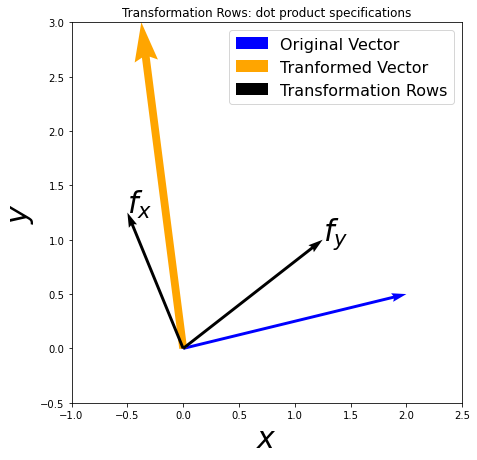

In [12]:
fig = plt.figure(figsize=(7,7))

plt.quiver([0],[0], X[0,:], X[1,:], 
           angles='xy', scale_units='xy', scale=1, 
           color='blue', label='Original Vector')

plt.quiver([0],[0], (C@X)[0,:], (C@X)[1,:], 
           angles='xy', scale_units='xy', scale=1, 
           color='orange', width=1/50, label='Tranformed Vector')

plt.quiver(0*C[:,0], 0*C[:,1], C[0,:], C[1,:], 
           angles='xy', scale_units='xy', scale=1, 
           color='black',
           label='Transformation Rows')


plt.text(C[0,0],C[0,1],"$f_{x}$", size=30)
plt.text(C[1,0],C[1,1],"$f_{y}$", size=30)

plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('$x$', size=30)
plt.ylabel('$y$', size=30)
plt.title('Transformation Rows: dot product specifications')

plt.xlim(-1, 2.5)
_=plt.ylim(-0.5, 3)

- Interprete this transformation using the dot product

$$\LARGE \vec x \cdot \vec y = ||\vec x|| \cdot ||\vec y|| \cdot cos(\theta_{\vec x \vec y})$$

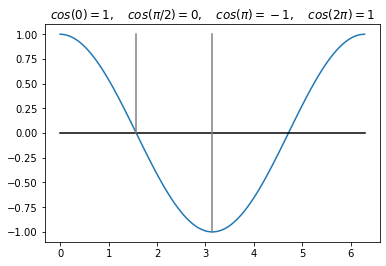

In [16]:
theta = np.linspace(0,2*np.pi,100)
plt.plot(theta, np.cos(theta))
plt.plot([0, 2*np.pi],[0]*2, c='black')
plt.plot([np.pi/2]*2,[0,1], c='gray')
plt.plot([np.pi]*2,[-1,1], c='gray')
_=plt.title("$cos(0)=1, \quad cos(\pi/2)=0, \quad cos(\pi)=-1, \quad cos(2\pi)=1$")


## Eigenvalues/Vectors
- The things you casually reference drop in conversations when you want to put the headlights in the deers eyes
    - So... what are they?
        - A nicer way to understand linear transformations (I.E./A.K.A. Matrix Multiplications)

In [17]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.det.html

eigval,eigvec = np.linalg.eig(C)
eigval,eigvec = -eigval, -eigvec

In [18]:
# oh, wait: what?
# https://stats.stackexchange.com/questions/205713/does-the-sign-of-eigenvectors-matter

- $C (c \times V) = \lambda (c \times V)$

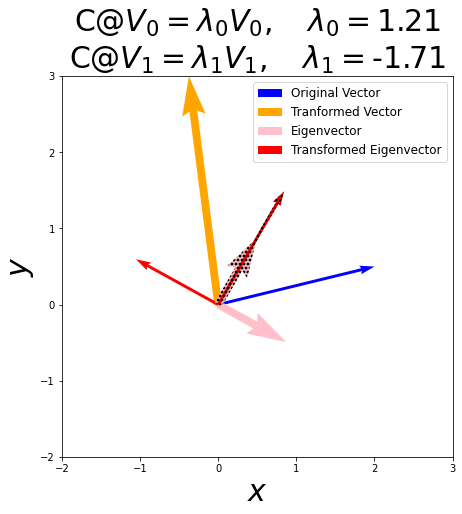

In [19]:
fig = plt.figure(figsize=(7,7))


plt.quiver([0],[0], X[0,:], X[1,:], 
           angles='xy', scale_units='xy', scale=1, color='blue', label='Original Vector')

plt.quiver([0],[0], (C@X)[0,:], (C@X)[1,:], 
           angles='xy', scale_units='xy', scale=1, color='orange', width=1/50, label='Tranformed Vector')


ev_i = 0
plt.quiver([0],[0], eigvec[0,ev_i], eigvec[1,ev_i], width=1/50, 
           angles='xy', scale_units='xy', scale=1, color='pink', label='Eigenvector')
plt.quiver([0],[0], (C@eigvec[:,[ev_i]])[0,:], (C@eigvec[:,[ev_i]])[1,:],
           angles='xy', scale_units='xy', scale=1, color='red', label='Transformed Eigenvector')

ev_i = 1
plt.quiver([0],[0], eigvec[0,ev_i], eigvec[1,ev_i], width=1/50, 
           angles='xy', scale_units='xy', scale=1, hatch='ooo', facecolor='pink')
plt.quiver([0],[0], (C@eigvec[:,[ev_i]])[0,:], (C@eigvec[:,[ev_i]])[1,:],
           angles='xy', scale_units='xy', scale=1, hatch='ooo', facecolor='red')


plt.legend(loc='upper right', prop={'size': 12})
plt.xlabel('$x$', size=30)
plt.ylabel('$y$', size=30)
plt.title("C@$V_0 = \lambda_0 V_0, \quad \lambda_0 = $"+str(np.round(eigval[0],2))+"\n"+
          "C@$V_1 = \lambda_1 V_1, \quad \lambda_1 = $"+str(np.round(eigval[1],2)), size=30)
plt.xlim(-2, 3)
_=plt.ylim(-2, 3)

In [20]:
# Hmm... the Eigenvectors are a little bit "normal" looking, no?

In [21]:
# Yep:
np.sum(eigvec[:,0]**2),np.sum(eigvec[:,1]**2)

(1.0000000000000002, 1.0000000000000002)

In [22]:
# What would this do? 
np.round(eigvec @ eigvec.T)

# now that's interesting, isn't it!?
# https://en.wikipedia.org/wiki/Orthogonal_matrix

array([[1., 0.],
       [0., 1.]])

## Some *more* cool things about *Eigenvalues*

### Condition Numbers

If $\underset{i,j}{max} \frac{\lambda_i}{\lambda_j}$ then `C@X` is "extremely unstable"
- small changes in `X` mean large changes in `C@X`

### Definiteness

*Positive Definite Matrix*: 
- $X^T C X > 0$ for all $X$ (`X.T @ (C @ X) > 0`)
- Symmetric matrix eigenvalues are *all* positive: $\lambda_i > 0$


*Negative Definite Matrix*: 
- $X^T C X < 0$ for all $X$ (`X.T @ (C @ X) < 0`)
- Symmetric matrix eigenvalues are *all* negative: $\lambda_i < 0$


## Gradient $\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$ and Hessian $\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$

$
\begin{array}{ccc}
\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = \left[ 
\begin{array}{c}
\frac{\partial}{\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\frac{\partial}{\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots\\
\frac{\partial}{\partial \theta_j} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots\\
\frac{\partial}{\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\end{array}
\right]
& and &
\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = \left[ 
\begin{array}{cccc}
\frac{\partial^2}{\partial \theta_1\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_1\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_1\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\frac{\partial^2}{\partial \theta_2\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_2\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_2\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots & \vdots &\ddots& \vdots\\
\frac{\partial^2}{\partial \theta_j\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_j\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_j\partial \theta_p} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\vdots & \vdots &\ddots& \vdots\\
\frac{\partial^2}{\partial \theta_p\partial \theta_1} f_{\boldsymbol{\theta}}(\mathbf{x}) &
\frac{\partial^2}{\partial \theta_p\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x}) &\cdots&
\frac{\partial^2}{\partial \theta_p\partial \theta_2} f_{\boldsymbol{\theta}}(\mathbf{x})\\
\end{array}
\right]
\end{array}$

- *If the derivatives exist, the function is continuous, and [the matrix is symmetric](https://en.wikipedia.org/wiki/Hessian_matrix)*

## Critical Points (of a function)

If $\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x}) = 0$ at $\boldsymbol{\theta}_0$, then $\boldsymbol{\theta}_0$ is a

- ***local minima[maxima]*** if $\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})$ is **positive[negative]** definite at $\boldsymbol{\theta}_0$
- local min if positive, local max if negative
 
- otherwise $\boldsymbol{\theta}_0$ may be a saddle point
    - and can't tell if $\lambda_i=0$ for some $i$


### Proof


Remember the [Taylor Series](https://en.wikipedia.org/wiki/Taylor_series) for arbitrary function approximation?

$\displaystyle 
\begin{align*}
f(\theta) = {} & \sum_{n=0}^{\infty} \frac{1}{n!}\frac{ \partial^n f(\theta_0)}{\partial \theta^n}(\theta-\theta_0)^n \\
\overset{e.g.}{\approx} {} &  
\underbrace{f(\theta_0)}_{\text{start at $\theta_0$}} + 
\underset{\text{linear change at $\theta_0$}}{\underbrace{\frac{ \partial f(\theta_0)}{\partial \theta}
(\overbrace{\theta-\theta_0}^{\text{move this far}})}_{\text{in the direction of}}} + 
\underset{\text{quadratic change at $\theta_0$}}{\underbrace{\frac{1}{2}\frac{ \partial^2 f(\theta_0)}{\partial \theta^2}
(\overbrace{\theta-\theta_0}^{\text{move this far}})^2}_{\text{in the direction of}}}\\
\end{align*}$

- The approximation is better for points near $\theta_0$ since there's less time for the higher order terms to contribute their deviation away from the linear trend

<br>

Second order Taylor series expansion of $f_{\boldsymbol{\theta}}(\textbf{x})$ at $\boldsymbol{\theta}_0$:

$f_{\boldsymbol{\theta}}(\textbf{x}) \approx \underset{\text{at}\;\boldsymbol{\theta}_0}{f_{\boldsymbol{\theta}}(\textbf{x})} + 
(\boldsymbol{\theta} - \boldsymbol{\theta}_0) \cdot
\underset{\text{at}\;\boldsymbol{\theta}_0} {\nabla_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})} 
+ \frac{1}{2}(\boldsymbol{\theta} - \boldsymbol{\theta}_0)^T \cdot
\underset{\text{at}\;\boldsymbol{\theta}_0}
{\mathbf{H}_{\boldsymbol{\theta}} f_{\boldsymbol{\theta}}(\textbf{x})}
\cdot (\boldsymbol{\theta} - \boldsymbol{\theta}_0)$

At $\boldsymbol{\theta}_0$ a ***local minimum[maximum]***
- the middle term goes to 0 **[*WHY?*]**
- the quadratic term must be positive[negative] for any $\boldsymbol{\theta} = \boldsymbol{\theta}_0 + \epsilon$ for any small $\epsilon$ **[*WHY?*]**


## In addition to the above

## here are the things you should have understood from your reading
- How softmax can correct for under/overflow
- How Hill Climbing works
    - that step size is an issue
    - that the step size issue can be analyzed, to some degree, using the Hession
- That thee Jacobian is a thing
- If you have a quadratic function, Newton's method can optimize it in one step
    - and if you have an approximately quadratic function, Newton's method (if used carefully) could optimize it quickly with a few iterations
- That constrained optimization started off based on 
    - the Lagrangian
    - and is now based on the KKT approach
        - and this can be used in, e.g.,
            - ridge/lasso regularization
            - SVM optimization
- $L_p$ norms, unit vectors (could be \emph{orthonormal} if they're also \emph{orthogonal})
    - Frobenius norm $\sqrt{Tr(AA^T)}$
- $x^Ty = ||x|| \cdot ||y|| \cdot cos(\theta)$
    - $=0$ if $\theta=\pi/2$... i.e., $x$ and $y$ are \emph{orthogonal}
        - a square matrix with mutually \emph{orthonormal} rows and mutually \emph{orthonormal} columns is called an \emph{orthogonal} matrix and $A^TA=AA^T=I$ and $A^T=A^-1$
- PCA

## And here are some Linear Algebra notes that you should be comfortable reading

- $(AB)^T = B^TA^T, \quad (x^Ty) = (x^Ty)^T = y^Tx$
- $A^T=A$ means $A$ is symmetric
- $A^{-1}A = I \;(= AA^{-1} \; \text{if $A$ is square... otherwise left and right inverses might exist and could be used})$
    - $(X^TX)^{-1}X^T y = \hat \beta$
    - $X\hat\beta = \hat y$
    - $X(X^TX)^{-1}X^T y = \hat y$
    - $H y = \hat y$
- $y = H^{-1}\hat y$
    - $H^{-1}$?
    - $(X^TX)^{-1}$?
- $A^{-1}$ of $A$ exists if 
    - $b$ and $x$ form a bijective 1:1 mapping in $Ax = b$ 
        - otherwise, if different $x_i$ map to the same $b$, then a single $b$ maps back to multiple $x_i$ in "$x = A^{-1}b$"
        - which is not possible for the function $A^{-1}$, so the inverse of $A$ cannot exist: the function $A$ is not invertable
    - Certainly *it could* be possible for multiple distinct $x_i$ to map to the same $b$ for some choices of $A$... e.g., $A=\textbf{0}$
        - but then that $A$ is not invertible.
    - If $x_i$ and $x_j$ are solutions to $Ax = b$ then so is $x_k = \alpha x_i + (1-\alpha) x_j$ for any real $\alpha$
    - It's *also* the case that **no** solutions exist to $Ax = b$
        - this would be the case if $b$ was not in the span of the column vectors of $A$
            - i.e., $x$ specifies the weighted average of the columns of $A$
                - if $b$ can't be made in this manner then it's not in the column space (also called the range) of $A$.              
- If the columns of square (m by m) matrix $A$ are linearly independent
    - (linearly independent: cannot be constructed from each other)
- then $A$ is called non-singular, and $A^-1$ exists. 
    - Solutions $x$ to $Ax = b$ can exist for non-square or singular (i.e., non-invertible) matrices... but you won't be able to use $A^{-1}$ to find them, since 
- Eigen decomposition of $A$ is $V \textbf{diag}(\boldsymbol{\lambda}) V^-1$ where the columns of $V$ are linearly independent eigenvectors of $A$ with corresponding eigenvalues $\boldsymbol{\lambda}$
    - eigen decompositions can involve imaginary numbers
    - symmetric, real-valued matrices decompose as $Q \textbf{diag}(\boldsymbol{\lambda}) Q^T$ where $Q$ is real valued and orthogonal
    - this eigen decomposition is unique if all eigenvalues are unique
    - A is singular iff (if and only if) any eigenvalue is 0.
        - $x^T A x$ for $||x||=1$ is maximally the largest eigenvalue and minimally the smallest.
    - All eigenvalues positive[negative] means positive[negative] definite: $x^T A x [>/<] 0$  
        - some 0's mean semi-definite: $x^T A x [\geq/\leq] 0$
- A real matrices have a real valued *singular value decomposition*: $A = U_{m\times m}D_{m\times n}V_{n\times n}^T$
    - $U$ (left singular vectors) and $V$ (right singular vectors) are orthogonal, and $D$ (holding the singular values) is diagonal 
        - $U$ is the eigenvectors of $AA^T$
        - $V$ is the eigenvectors of $A^TA$
        - the square roots of the singular values are the eigenvalues of $AA^T$ and $A^TA$
- *Moore-Penrose pseudoinverse*: $A^+ = \underset{\alpha \rightarrow 0}{lim}(A^TA + \alpha I)^{-1} A^T$
\begin{align*}
(A^+)A =& I = (VD^+U^T)UDV^T\\
A^+ =& (VD^+U^T)\\
\end{align*}
    - Solution $x = A^+b$ for $Ax = b$ has minimum $||x||$ for all possible solutions $x$
    - If no solution $x$ exists for $Ax = b$ for $b$ then $||Ax - b||$ is the minimum possible if $x = A^+b$
    
- $Tr(ABC)=Tr(BCA)=Tr(CAB)$
- $Det(A)$ is the product of the eigenvalues
    - it is therefore a measure of "space expansion" of the matrix $A$


# And *OF COURSE* you must be Python proficient... git gud!!